<a href="https://colab.research.google.com/github/nikitha-ramchander/sales-prediction/blob/main/SalesDataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Data
sales = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Project/salesdatacleaning.csv')
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,No_Weight_Flag
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0


#Data Visualization
Built several data visualizations that help better understand the data.

1. What are the total sales for each type of item?

In [4]:
item_type = sales.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending= False)

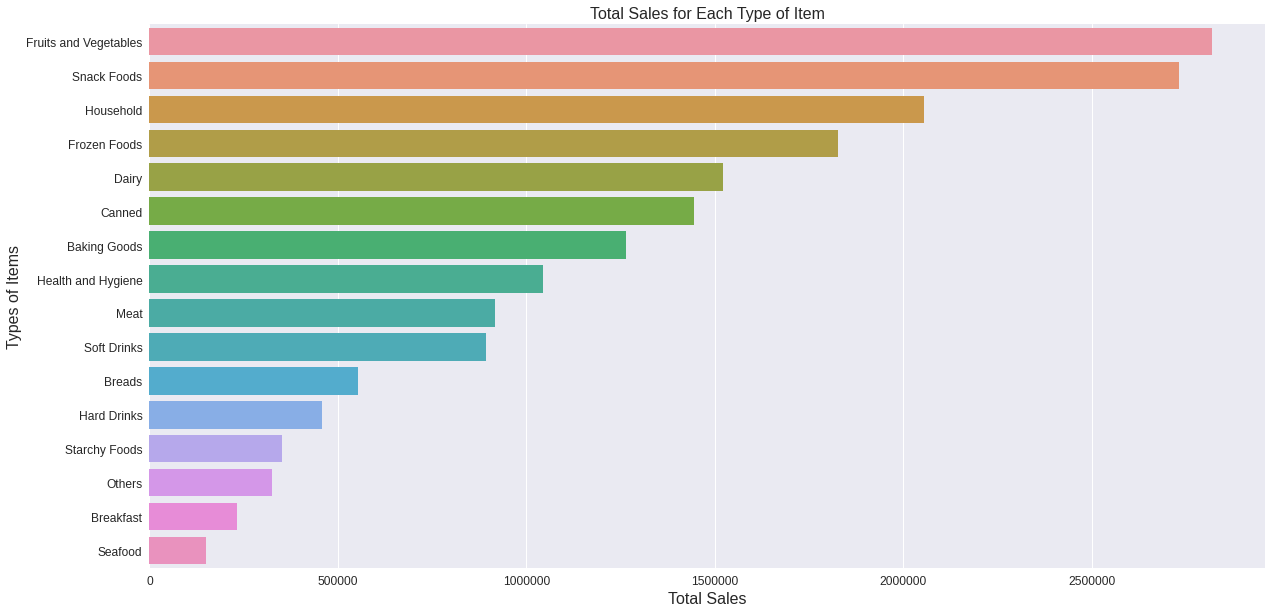

In [41]:
plt.figure(figsize=(20,10));
plt.style.use('seaborn');
sns.barplot(x = item_type.values, y = item_type.index)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xlabel('Total Sales', fontsize = 16)
plt.ylabel('Types of Items', fontsize = 16)
plt.title('Total Sales for Each Type of Item', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')

Interpretation: Frutis and Vegatables has the most sales coming in at over 2.5 million. Seafood has the least amount of sales at around one hundred thousand. 

2. What is the average sales for each type of outlet?

In [9]:
outlet_type = sales.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending = False)

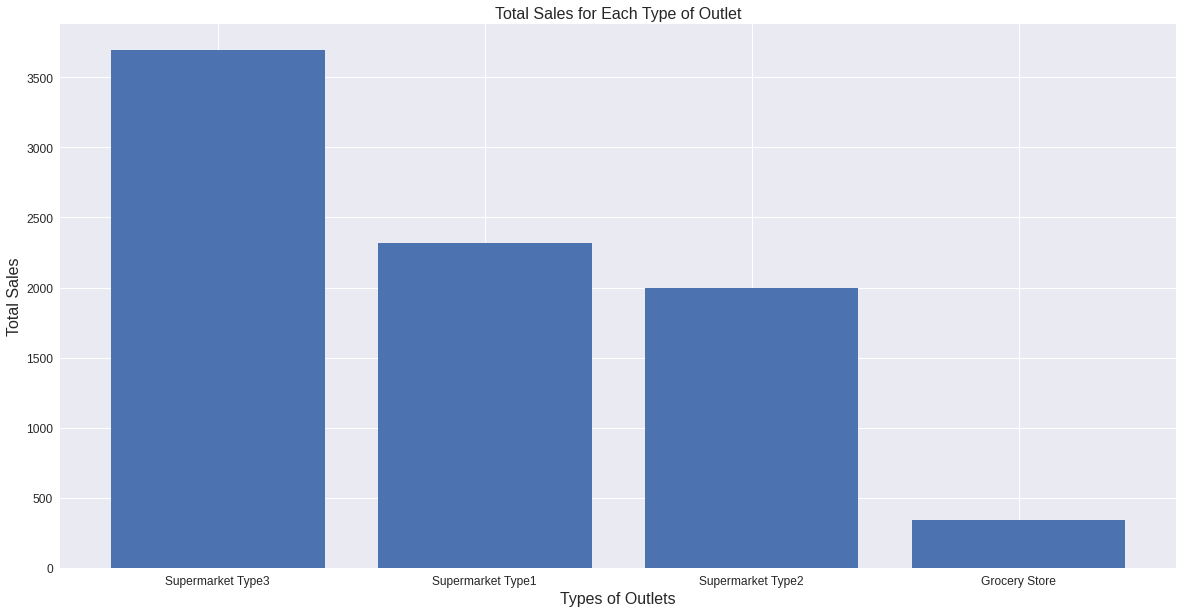

In [40]:
plt.figure(figsize=(20,10));
plt.style.use('seaborn');
plt.bar(outlet_type.index, outlet_type.values);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xlabel('Types of Outlets', fontsize = 16);
plt.ylabel('Total Sales', fontsize = 16);
plt.title('Total Sales for Each Type of Outlet', fontsize = 16);

Interpretation: On average each Supermarket Type3 makes a total sale of over 3500 which is the most of the 4 outlet types. Grocery Outlet Type makes less than $500 for each outlet.

3. What are the total sales for each year of establishment? 

In [11]:
establishment = sales.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()

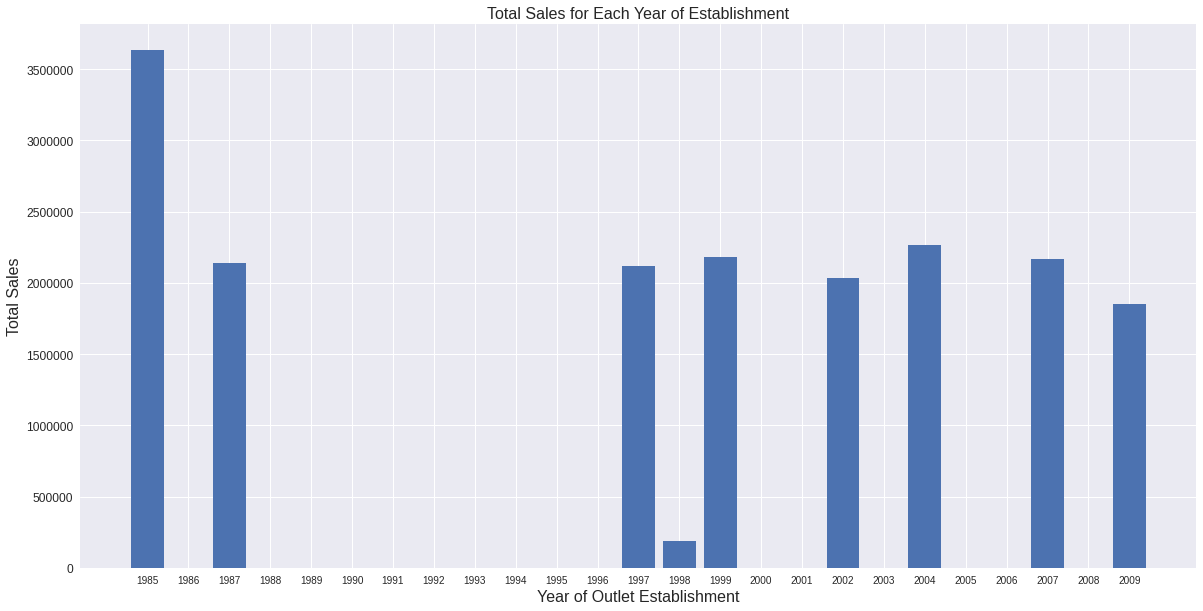

In [39]:
plt.figure(figsize=(20,10));
plt.bar(establishment.index, establishment.values);
x = establishment.index
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(fontsize = 12);
plt.xlabel('Year of Outlet Establishment', fontsize = 16);
plt.ylabel('Total Sales', fontsize = 16);
plt.title('Total Sales for Each Year of Establishment', fontsize = 16);
# Get rid of scientific notation: https://www.reddit.com/r/learnpython/comments/el4vbx/how_to_remove_scientific_notation_from_a/
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False);

Interpretation: The year 1985 had the most sales and the year 1998 had the lowest sales. From this graph you can also tell the years between 1987 and 1997 has no data. I'm assuming data wasn't gathered for those years.

4. Show distribution of Item Outlet Sales.  

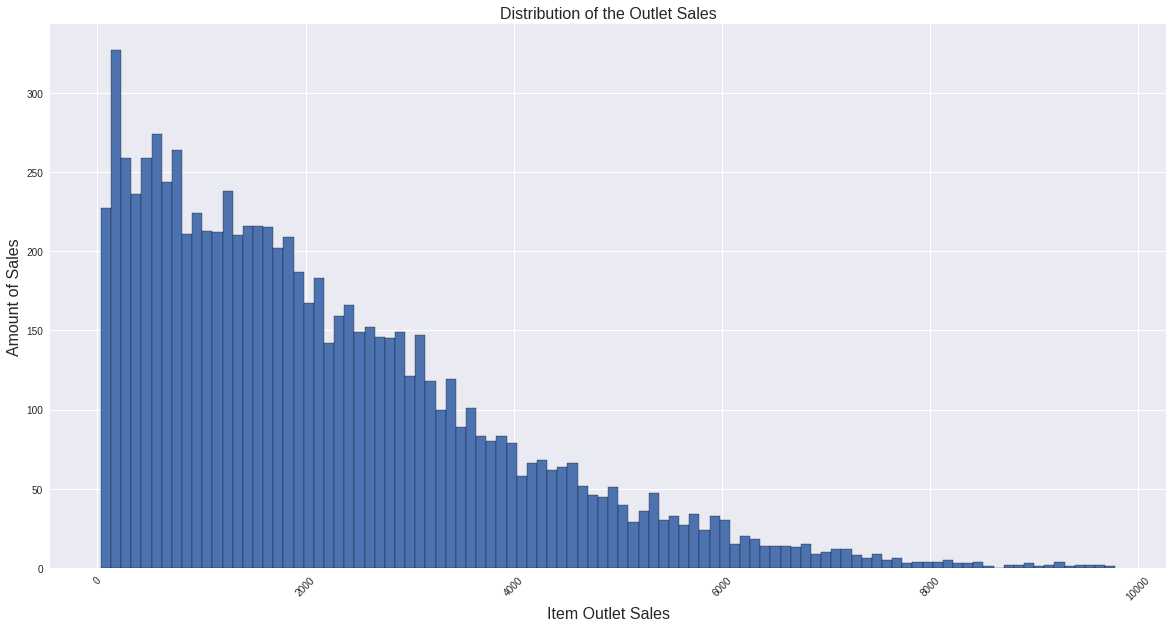

In [37]:
plt.style.use('seaborn')
plt.figure(figsize=(20,10));
price_filter = sales.loc[:, 'Item_Outlet_Sales'] <= 10000
sales.loc[price_filter, 'Item_Outlet_Sales'].hist(bins = 100,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Item Outlet Sales', fontsize = 16);
plt.ylabel('Amount of Sales', fontsize = 16);
plt.title('Distribution of the Outlet Sales', fontsize = 16);

Interpretation: This graphs shows the price range for the amount of outlet sales being done. There are higher bars in the really low price range meaning that most items are sold under $200. 

5. Show a boxplot of all the Item Types and their respective sales. 

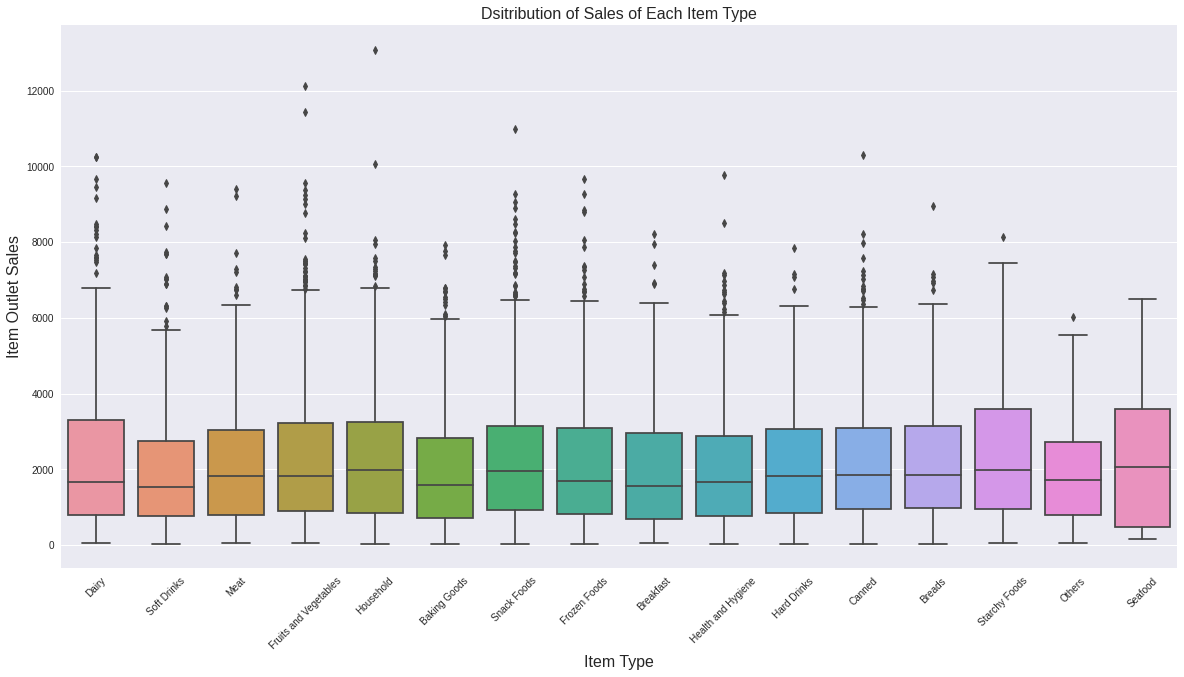

In [38]:
plt.figure(figsize=(20,10));
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=sales);
plt.xticks(rotation = 45);
plt.xlabel('Item Type', fontsize = 16);
plt.ylabel('Item Outlet Sales', fontsize = 16);
plt.title('Dsitribution of Sales of Each Item Type', fontsize = 16);

Interpretation: Overall all Item Types are fairly consistent mostly around the 2,000 mark which back up our finding in the previous graph. The lower 25% has a short distance meaning that the data is tightly packed and a lot of our data has low sale amounts. The top 25% has varying degrees and is more spread out showing us highers  range of sales. For Item Types of 'Fruits and Vegetables' and 'Household' they have the most spread out outliers which means that there were sales in the $12,000 range. 

6. Create a heatmap of the correlation between features.

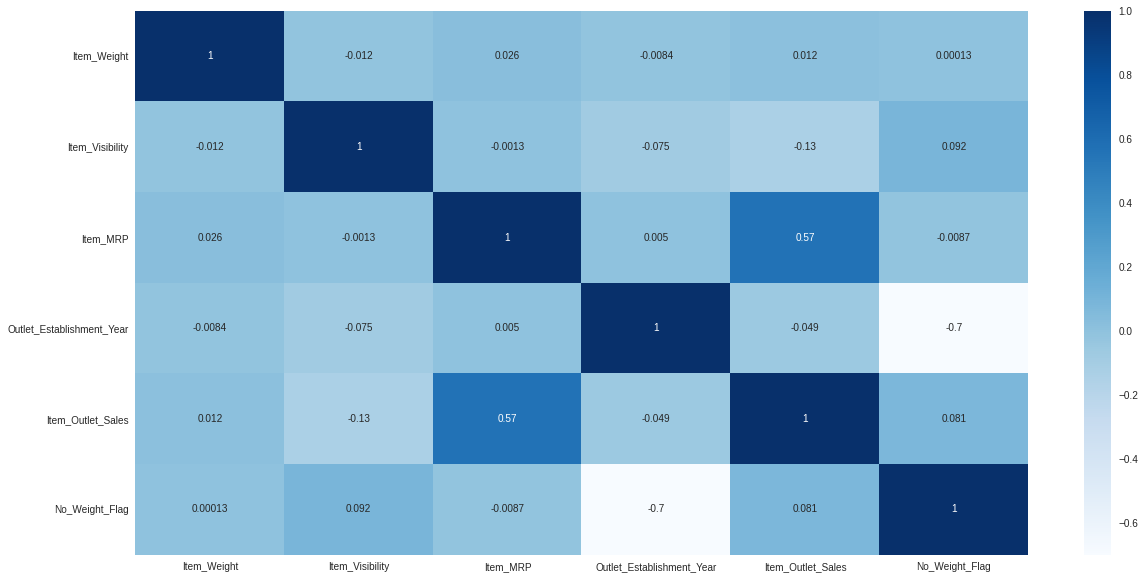

In [30]:
plt.figure(figsize=(20,10));
sns.heatmap(sales.corr(), annot= True, cmap= 'Blues', )

Interpretation: This heatmap shows the correlation with all the features. The darker blues show a perfect correlation and the almost white will show no correlation. Given the '1' correlation which is the correlation of the feature in itself. The next strongest correlation is between'Item Outlet Sales' and 'Item MRP'. This might be the case because if we know the maximum retail price (list price) of the product then we can predict how many total sales there will be of each product. There is barely any correlation with the new column 'No Weight Flag' and 'Outlet Establishment Year' reason being the year 1985 had no record of Item Weight for any of the Item Types. 